In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Pragyan
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df=pd.read_csv("essays.csv", encoding='latin1')

In [4]:
df.head()

,#AUTHID,TEXT,cEXT,cNEU,cAGR,cCON,cOPN
0,1997_504851.txt,"Well, right now I just woke up from a mid-day ...",n,y,y,n,y
1,1997_605191.txt,"Well, here we go with the stream of consciousn...",n,n,y,n,n
2,1997_687252.txt,An open keyboard and buttons to push. The thin...,n,y,n,y,y
3,1997_568848.txt,I can't believe it! It's really happening! M...,y,n,y,y,n
4,1997_688160.txt,"Well, here I go with the good old stream of co...",y,n,y,n,y


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   #AUTHID      2467 non-null   object
 1   TEXT         2467 non-null   object
 2   cEXT         2467 non-null   object
 3   cNEU         2467 non-null   object
 4   cAGR         2467 non-null   object
 5   cCON         2467 non-null   object
 6   cOPN         2467 non-null   object
 7   clean_essay  2467 non-null   object
 8   score        2467 non-null   int32 
dtypes: int32(1), object(8)
memory usage: 163.9+ KB


In [5]:
import re

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  
    text = text.lower()  
    text = ' '.join([word for word in text.split() if word not in nltk.corpus.stopwords.words('english')])
    return text

df['clean_essay'] = df['TEXT'].apply(preprocess_text)

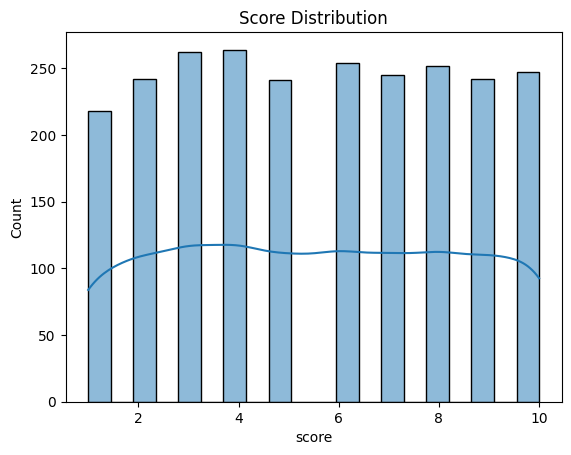

In [6]:
import numpy as np
df['score'] = np.random.randint(1, 11, df.shape[0])

sns.histplot(df['score'], bins=20, kde=True)
plt.title("Score Distribution")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(df['clean_essay'], df['score'], test_size=0.2, random_state=42)


In [7]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [8]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

RandomForestRegressor(random_state=42)

In [9]:
y_pred = model.predict(X_test_tfidf)

In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 2.4460121457489876
Mean Squared Error: 7.941475101214574


In [11]:
def predict_score(essay):
    processed_essay = preprocess_text(essay)
    transformed_essay = vectorizer.transform([processed_essay])
    predicted_score = model.predict(transformed_essay)
    return predicted_score[0]

In [12]:
new_essay = "This is an example essay with great structure and content."
print("Predicted Score:", predict_score(new_essay))

Predicted Score: 3.97


In [13]:
with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

with open("vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)